In [1]:
## Import libraries & Packages

# Data structure and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import colorsys
%matplotlib inline

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
########## Useful functions ##########

## Functions for visualizations

# Generating 'N' random colors. eg) gen_colors(5) will generate 5 random colors.
def gen_colors(N):
    HSV_tuples = [(x*1.0/N, 0.5, 0.5) for x in range(N)]
    RGB_tuples = map(lambda x: colorsys.hsv_to_rgb(*x), HSV_tuples)
    return [*RGB_tuples]
    
# def gen_colors_2(N):    
#     colorpools = ['lightcoral', 'gold', 'green', 'Chartreuse','Lime Green', 'Khaki', 'Aquamarine', 'Dark Slate Blue']
#     a, b = N//8, N%8  
#     if a == 0:
#         return colorpools[0:b]
#     else:
#         return colorpools + gen_colors(N%8)

    

# Generating a pie chart with the 'input' series with the 'title' on the axis 'ax'. 
# eg) pie_chart_count(titanic_df.Pclass, 'Pclass', ax1)
# It counts the number of each class in the input category and shows it by percentage.
def pie_chart_count(input, title, ax):
    num = len(set(input))
    categories = list(set(input))
    labels = [str(x) for x in categories]
    categories_ratio = [j for j in input.groupby(input).size()] 
    colors = gen_colors(num)
    ax.set_title('Counts of different ' + title +'es')
    return ax.pie(categories_ratio, labels=labels, 
                   colors=colors, autopct='%1.1f%%', startangle=90)

# Generating a pie chart with the 'input' series on the axis 'ax'. 
# eg) pie_chart_avg(Pclass_surv_mean, ax2)
# It shows the survival rate of each class in the input category.
def pie_chart_avg(input, ax):
    num = len(input)
    title = input.index.name
    categories_ratio = [j for j in input.Survived] # 산 사람 중 여자 얼마 남자 얼마 
    colors = gen_colors(num)
    ax.set_title('Survival ratio by each class of ' + title)
    return ax.pie(categories_ratio, labels=input.index, 
                   colors=colors, autopct='%1.1f%%', startangle=90)

def bar_chart_avg(input, ax):
    num = len(input)
    title = input.index.name
    colors = gen_colors(num)
    conv_input = input.copy()
    conv_input[input.index.name] = input.index
    ax.set_title('Survival rate per each class of ' + title)
    ax.set_ylim([0,1])
    return sns.barplot(title, 'Survived', data = conv_input, ax = ax, palette = colors)

# Combining pie_chart_count and pie_chart_avg (** made separate functions for occasional seperate usage)
# eg) pie_chart('Pclass')
# It shows the count and survival of the input category in a pie chart format.
def pie_chart(input):
    f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (16, 5))
    pie_chart_count(titanic_df[input], input, ax1)
    surv_mean_per = titanic_df[[input, 'Survived']].groupby(input, as_index = True).mean()
    surv_mean_by = titanic_df[[input, 'Survived']].groupby(input, as_index = True).sum()
    pie_chart_avg(surv_mean_by, ax2)
    bar_chart_avg(surv_mean_per, ax3)
    


# Generating a feature scaler (MinMaxScaler)
MMS = MinMaxScaler((0,10), False)    

# This function applies MMS feature scaling and plot the before and after of the input series.
# MMS_and_Plot(titanic_df, 'Fare')
def MMS_and_Plot(df, title):
    f, (ax1, ax2) = plt.subplots(1,2, figsize = (20,5))
    ax1.set_title(title + ' before feature scaling')
    ax2.set_title(title + ' after feature scaling')
    ax1.hist(df[title], bins = 40, color = 'skyblue')
    MMS.fit_transform(df[title]) 
    ax2.hist(df[title], bins = 40, color = 'salmon')

# Replace the string values to dummies
# eg) replace_w_dummies(titanic_df, 'Sex')
def replace_w_dummies(df, title):
    dummies = pd.get_dummies(df[title])
    df.drop(title, axis = 1, inplace = True)
    df = df.join(dummies)
    return df

def surv_rate(category):
    counted = pd.DataFrame(titanic_df[category].groupby(titanic_df[category]).size())
    counted[category] = counted.index
    counted.rename(columns = {0:'Count'}, inplace = True)
    surv_rate = titanic_df[[category, 'Survived']].groupby(category, as_index = False).mean()
    surv_count = pd.merge(counted, surv_rate)
    surv_count = surv_count[[category, 'Count','Survived']].sort_values(by = 'Survived', ascending = False)
    return surv_count

In [3]:
titanic_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
titanic_df.info()
print('---------------------------------')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
---------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object

In [5]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
titanic_df.drop(['PassengerId', 'Ticket', 'Cabin'], axis = 1, inplace=True)
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [8]:
test_df.drop(['Ticket', 'Cabin'], axis = 1, inplace=True)
#test_df.head()

In [9]:
titanic_df.describe(include = 'all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891.000000,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,"Barton, Mr. David John",male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,NaN,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,32.204208,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,49.693429,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,7.910400,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,31.000000,NaN


In [10]:
# Name

titanic_df.Name = titanic_df.Name.str.extract('([A-Za-z]+)\.', expand = False)
test_df.Name = test_df.Name.str.extract('([A-Za-z]+)\.', expand = False)
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,Mr,male,22.0,1,0,7.2500,S
1,1,1,Mrs,female,38.0,1,0,71.2833,C
2,1,3,Miss,female,26.0,0,0,7.9250,S
3,1,1,Mrs,female,35.0,1,0,53.1000,S
4,0,3,Mr,male,35.0,0,0,8.0500,S


In [11]:
surv_rate('Name')

,Name,Count,Survived
16,Sir,1,1.000000
2,Countess,1,1.000000
14,Ms,1,1.000000
11,Mme,1,1.000000
6,Lady,1,1.000000
10,Mlle,2,1.000000
13,Mrs,125,0.792000
9,Miss,182,0.697802
8,Master,40,0.575000
1,Col,2,0.500000


In [12]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,Mr,male,22.0,1,0,7.2500,S
1,1,1,Mrs,female,38.0,1,0,71.2833,C
2,1,3,Miss,female,26.0,0,0,7.9250,S
3,1,1,Mrs,female,35.0,1,0,53.1000,S
4,0,3,Mr,male,35.0,0,0,8.0500,S


In [13]:
test_df.Name.groupby(test_df.Name).size()

Name
Col         2
Dona        1
Dr          1
Master     21
Miss       78
Mr        240
Mrs        72
Ms          1
Rev         2
dtype: int64

In [14]:
titanic_df['Name'] = titanic_df['Name'].replace(['Sir', 'Master', 'Col', 'Major', 'Jonkheer', 'Don', 'Dr'], 'NB_M')
titanic_df['Name'] = titanic_df['Name'].replace(['Rev', 'Capt'], 'C_M')
titanic_df['Name'] = titanic_df['Name'].replace(['Countess', 'Mme', 'Mlle', 'Ms', 'Lady'], 'NB_L')
Name_map = {'NB_L':1, 'Mrs':2, 'Miss':3, 'NB_M':4, 'Mr':5, 'C_M':6}
titanic_df['Name'] = titanic_df['Name'].map(Name_map)

test_df['Name'] = test_df['Name'].replace(['Sir', 'Master', 'Col', 'Major', 'Jonkheer', 'Don', 'Dr'], 'NB_M')
test_df['Name'] = test_df['Name'].replace(['Rev', 'Capt'], 'C_M')
test_df['Name'] = test_df['Name'].replace(['Countess', 'Mme', 'Mlle', 'Ms', 'Lady', 'Dona'], 'NB_L')
test_df.Name.groupby(test_df.Name).size()
Name_map = {'NB_L':1, 'Mrs':2, 'Miss':3, 'NB_M':4, 'Mr':5, 'C_M':6}
test_df['Name'] = test_df['Name'].map(Name_map)
test_df.Name

0      5
1      2
2      5
3      5
4      2
5      5
6      3
7      5
8      2
9      5
10     5
11     5
12     2
13     5
14     2
15     2
16     5
17     5
18     3
19     2
20     5
21     4
22     2
23     5
24     2
25     5
26     3
27     5
28     5
29     5
      ..
388    5
389    4
390    5
391    2
392    4
393    5
394    5
395    2
396    5
397    2
398    5
399    5
400    3
401    5
402    3
403    5
404    5
405    5
406    5
407    5
408    3
409    3
410    3
411    2
412    3
413    5
414    1
415    5
416    5
417    4
Name: Name, dtype: int64

In [15]:
test_df.Name.groupby(test_df.Name).size()

Name
1      2
2     72
3     78
4     24
5    240
6      2
dtype: int64

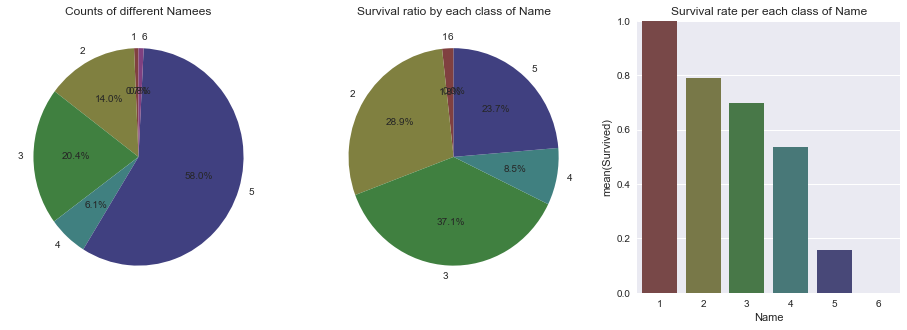

In [16]:
pie_chart('Name')

   Pclass  Count  Survived
0       1    216  0.629630
1       2    184  0.472826
2       3    491  0.242363


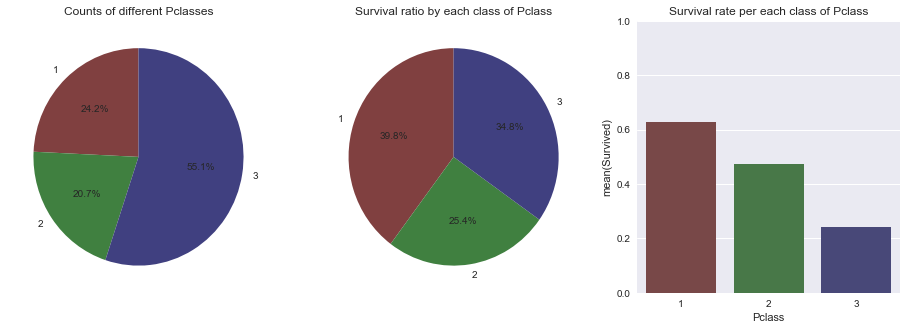

In [17]:
# Pclass

# Visualization
print(surv_rate('Pclass'))
pie_chart('Pclass')

      Sex  Count  Survived
0  female    314  0.742038
1    male    577  0.188908


/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/ipykernel/__main__.p

int64


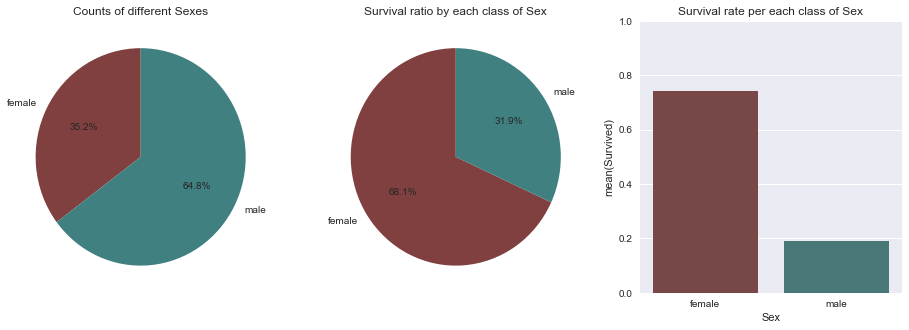

In [18]:
# Sex

# Visualization
print(surv_rate('Sex'))
pie_chart('Sex')

# # Replace with dummies  
# titanic_df = replace_w_dummies(titanic_df, 'Sex')
# test_df = replace_w_dummies(test_df, 'Sex')

titanic_df.Sex[titanic_df.Sex == 'male'] = 1
titanic_df.Sex[titanic_df.Sex == 'female'] = 2
test_df.Sex[test_df.Sex == 'male'] = 1
test_df.Sex[test_df.Sex == 'female'] = 2
titanic_df.Sex = titanic_df.Sex.astype('int')
test_df.Sex = test_df.Sex.astype('int')
print(titanic_df.Sex.dtype)
# titanic_df.Sex



/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


The average age of each age agroup is [2.5, 10, 20, 30, 40, 50, 60, 75] 
and the average survival rate of each group is ['0.59', '0.34', '0.35', '0.42', '0.36', '0.40', '0.24', '0.12']


/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape you

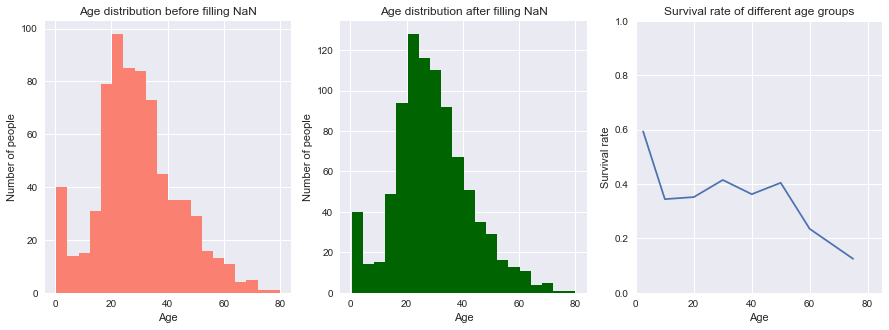

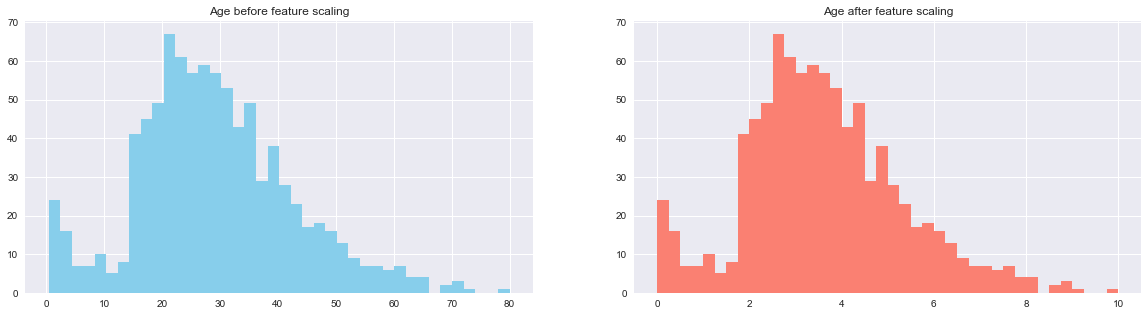

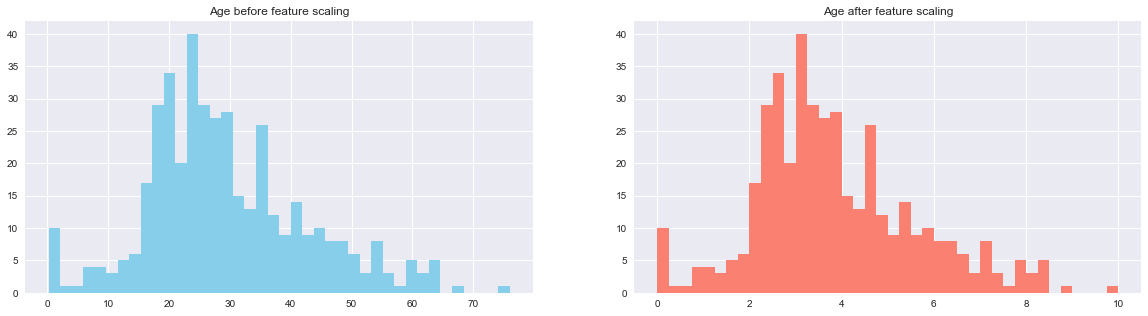

In [19]:
##### Age #####

## Check the distribution of the ages before and after filling NAN

# Before filling NAN
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (15,5))
ax1.set_title('Age distribution before filling NaN')
ax1.set_xlabel('Age')
ax1.set_ylabel('Number of people')
titanic_df.Age.hist(bins = 20, ax = ax1, color = 'salmon')

# Fill NAN and visualize the distribution
def Age_fill_na(df):
    size = df.Age.isnull().sum()
    Age_mean, Age_std = titanic_df.Age.mean(), titanic_df.Age.std()
    random_ages = np.random.randint(Age_mean - Age_std, Age_mean + Age_std, size)
    df.Age[df.Age.isnull()] = random_ages

Age_fill_na(titanic_df)
Age_fill_na(test_df)

ax2.set_title('Age distribution after filling NaN')
ax2.set_xlabel('Age')
ax2.set_ylabel('Number of people')
titanic_df.Age.hist(bins = 20, ax = ax2, color = 'darkgreen')

## Check the relation between age and survival rate, visualize it.

# age_groups = [2.5, 10, 20, 30, ..., 60, 75], each number represents the average age value of each group
# 10 years interval except for kids and elderly, kids age difference may mean a lot, elderly above 60y may not.

age_groups = [10*x for x in range(7)]
# surv_mean_per_age  = [titanic_df.Survived[titanic_df.Age <= 5].mean()]
# surv_std_per_age = [titanic_df.Survived[titanic_df.Age <= 5].std()]
# surv_num_per_age = [titanic_df.Survived[titanic_df.Age <= 5].sum()]
  
surv_mean_per_age, surv_std_per_age,surv_num_per_age = [],[],[]
for a in age_groups:
    surv_mean_per_age += [titanic_df.Survived[(titanic_df.Age <= a+10) & (titanic_df.Age > a)].mean()]
    surv_std_per_age += [titanic_df.Survived[(titanic_df.Age <= a+10) & (titanic_df.Age > a)].std()]
    surv_num_per_age += [titanic_df.Survived[(titanic_df.Age <= a+10) & (titanic_df.Age > a)].sum()]

age_groups = [2.5] + age_groups[1:] + [75]
surv_mean_per_age += [titanic_df.Survived[(titanic_df.Age <= 85) & (titanic_df.Age > 65)].mean()]
# surv_std_per_age += [titanic_df.Survived[(titanic_df.Age <= 85) & (titanic_df.Age > 65)].std()]
# surv_num_per_age += [titanic_df.Survived[(titanic_df.Age <= 85) & (titanic_df.Age > 65)].sum()]
# surv_serr_per_age = zip(surv_std_per_age, [np.sqrt(x) for x in surv_num_per_age])
# serr = [a/b for a,b in surv_serr_per_age] # standard error for each age group

print('The average age of each age agroup is {} \nand the average survival rate of each group is {}'
      .format(age_groups, [ '%.2f' %s for s in surv_mean_per_age]))
ax3.set_title('Survival rate of different age groups')
ax3.set_ylim([0,1])
ax3.set_xlim([0,85])
ax3.set_xlabel('Age')
ax3.set_ylabel('Survival rate')
ax3.plot(age_groups, surv_mean_per_age)


# Feature scaling
MMS_and_Plot(titanic_df, 'Age')
MMS_and_Plot(test_df, 'Age')

0 45 200
1 6 10


/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/ipykernel/__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/ipykernel/__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


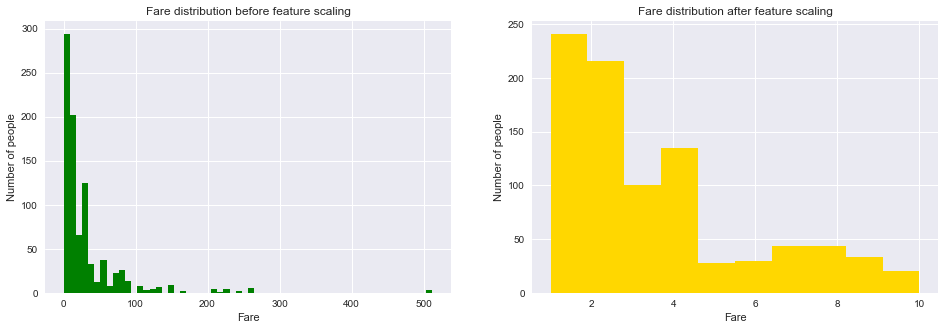

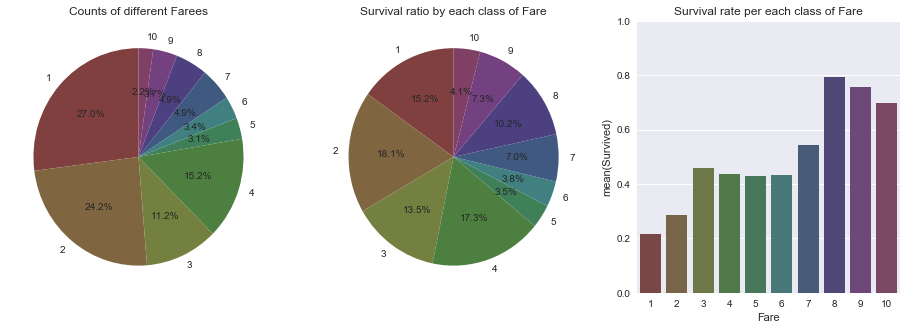

In [20]:
# Fare 

# Fill NAN in test_df
test_df.Fare.fillna(test_df.Fare.mean(), inplace = True)


f, (ax1, ax2) = plt.subplots(1,2, figsize = (16,5))
ax1.set_title('Fare distribution before feature scaling')
ax1.set_xlabel('Fare')
ax1.set_ylabel('Number of people')
ax1.hist(titanic_df.Fare, bins = 60, color = 'green')

# Feature scale the Fare using customized feature scale function -
# as the distribution of fare is very uneven and the variance is also huge.

fare_groups = [0, 8] + [10*x+5 for x in range(1, 6)] +[75, 100, 200]
num_groups = [str(x+1) for x in range(10)]
print(fare_groups[0], fare_groups[5], fare_groups[9])
print(num_groups[0], num_groups[5], num_groups[9])
def Fare_feature_scale(df):
    for f in range(9):  
        df.Fare[(df.Fare >= fare_groups[f]) & (df.Fare < fare_groups[f+1]) ] = fare_groups[f]
    df.Fare[df.Fare >= fare_groups[9]] = fare_groups[9]
    for f in range(10):
        df.Fare[df.Fare == fare_groups[f]] = num_groups[f]
    df.Fare = df.Fare.astype('int')

Fare_feature_scale(titanic_df)    
Fare_feature_scale(test_df)    

ax2.set_title('Fare distribution after feature scaling')
ax2.set_xlabel('Fare')
ax2.set_ylabel('Number of people')
ax2.hist(titanic_df.Fare, bins = 10, color = 'gold')


pie_chart('Fare')

/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/ipykernel/__main__.p

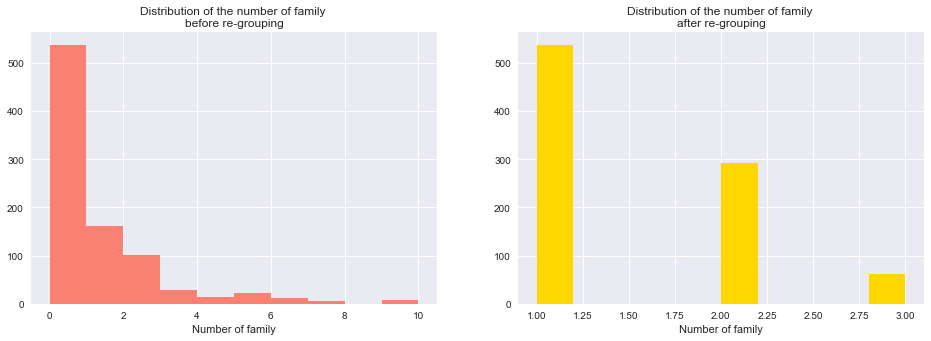

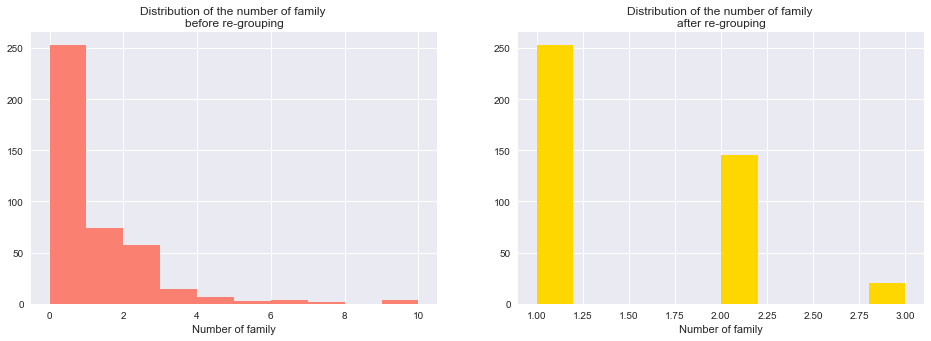

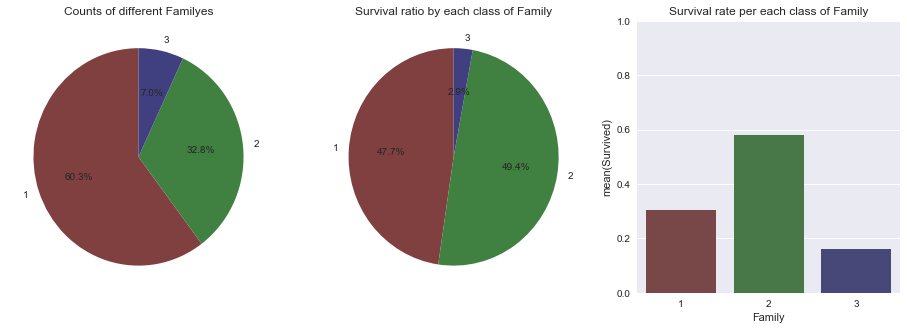

In [21]:
# Family



# Sibling, Spouse, Parents, and children are all combined in Family category
# Simplify into 3 groups: Alone, family less than 3, family more than 3
def Family(df):
    f, (ax1, ax2) = plt.subplots(1,2, figsize = (16,5))
    df['Family'] = df.SibSp + df.Parch
    ax1.hist(df.Family, color = 'salmon')
    ax1.set_title('Distribution of the number of family \nbefore re-grouping')
    ax1.set_xlabel('Number of family')
    df.drop(['SibSp', 'Parch'], axis = 1, inplace = True)
    df.Family[(df.Family > 1) & (df.Family <= 3)] , df.Family[df.Family > 4]  = 1,4
    df.Family[df.Family == 4] = 3
    df.Family[df.Family == 1] = 2 
    df.Family[df.Family == 0] = 1  
    
    ax2.hist(df.Family, color = 'gold')
    ax2.set_title('Distribution of the number of family \nafter re-grouping')
    ax2.set_xlabel('Number of family')

Family(titanic_df)
Family(test_df)

pie_chart('Family')

/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/ipykernel/__main__.py:9

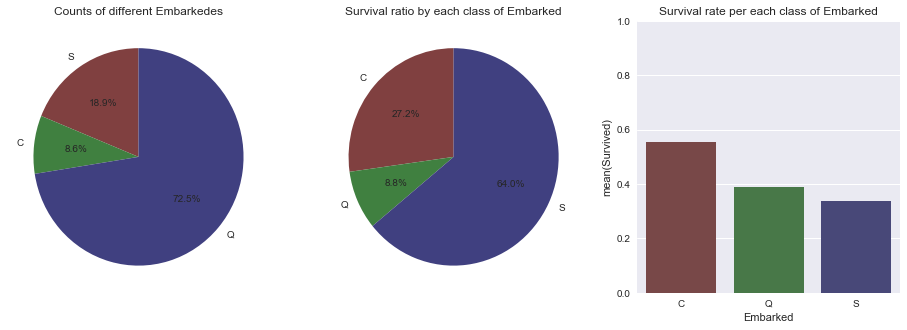

In [22]:
# Embarked

fill_value = titanic_df.Embarked.value_counts().idxmax()
titanic_df.Embarked.fillna(fill_value, inplace = True)
pie_chart('Embarked')
titanic_df.Embarked[titanic_df.Embarked =='C'] = 1
titanic_df.Embarked[titanic_df.Embarked =='S'] = 2
titanic_df.Embarked[titanic_df.Embarked =='Q'] = 3
test_df.Embarked[test_df.Embarked =='C'] = 1
test_df.Embarked[test_df.Embarked =='S'] = 2
test_df.Embarked[test_df.Embarked =='Q'] = 3
titanic_df.Embarked = titanic_df.Embarked.astype('int')
test_df.Embarked = test_df.Embarked.astype('int')
# titanic_df.Embarked

In [23]:
titanic_df.info()
print('_______________________________________')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
Fare        891 non-null int64
Embarked    891 non-null int64
Family      891 non-null int64
dtypes: float64(1), int64(7)
memory usage: 55.8 KB
_______________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
Fare           418 non-null int64
Embarked       418 non-null int64
Family         418 non-null int64
dtypes: float64(1), int64(7)
memory usage: 26.2 KB


In [24]:
titanic_df.head(n = 15)

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Family
0,0,3,5,1,2.711737,1,2,2
1,1,1,2,2,4.722292,7,1,2
2,1,3,3,2,3.214375,1,2,1
3,1,1,2,2,4.345313,6,2,2
4,0,3,5,1,4.345313,2,2,1
5,0,3,5,1,4.345313,2,3,1
6,0,1,5,1,6.732847,6,2,1
7,0,3,4,1,0.198542,3,2,3
8,1,3,2,2,3.340035,2,2,2
9,1,2,2,2,1.706459,4,1,2


In [25]:
test_df.head(n = 15)

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,Family
0,892,3,5,1,4.527232,1,3,1
1,893,3,2,2,6.175656,1,2,2
2,894,2,5,1,8.153765,2,3,1
3,895,3,5,1,3.538178,2,2,1
4,896,3,2,2,2.878808,2,2,2
5,897,3,5,1,1.823816,2,2,1
6,898,3,3,2,3.933799,1,3,1
7,899,2,5,1,3.406304,4,2,2
8,900,3,2,2,2.351312,1,1,1
9,901,3,5,1,2.746934,3,2,2


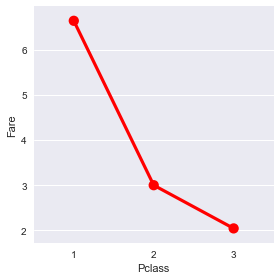

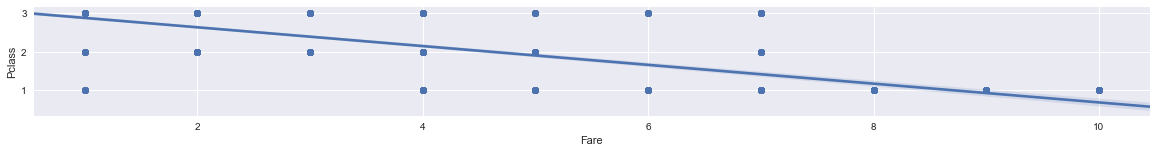

In [26]:
# Correlation between Pclass and Fare
mean1 = titanic_df[['Pclass','Fare']].groupby('Pclass', as_index = False).mean()
data2 = titanic_df[['Pclass','Fare']]
sns.factorplot(x = 'Pclass', y = 'Fare', data = mean1, color = 'red')
f, ax = plt.subplots(1,1,figsize = (20,2))
sns.regplot(x = 'Fare', y = 'Pclass', data = data2 , ax = ax)

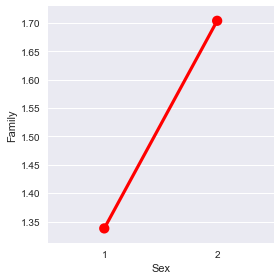

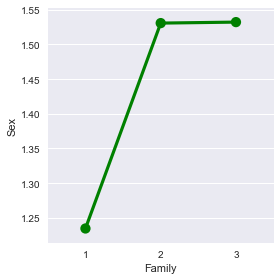

In [27]:
# Correlation between Sex and Family
mean1 = titanic_df[['Sex','Family']].groupby('Sex', as_index = False).mean()
mean2 = titanic_df[['Sex','Family']].groupby('Family', as_index = False).mean()
sns.factorplot(x = 'Sex', y = 'Family', data = mean1, color = 'red')
sns.factorplot(x = 'Family', y = 'Sex', data = mean2 , color = 'green')

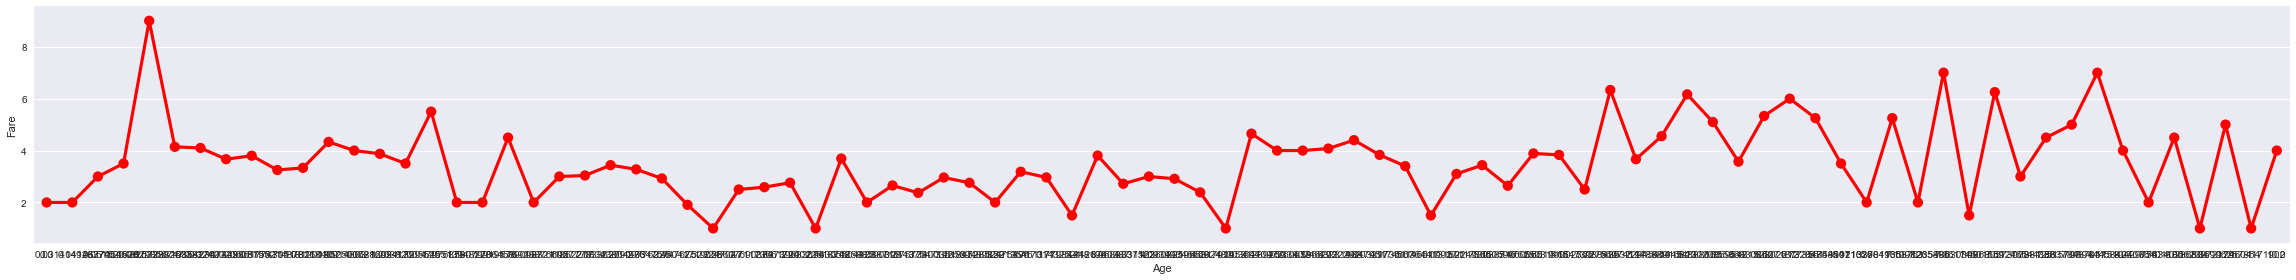

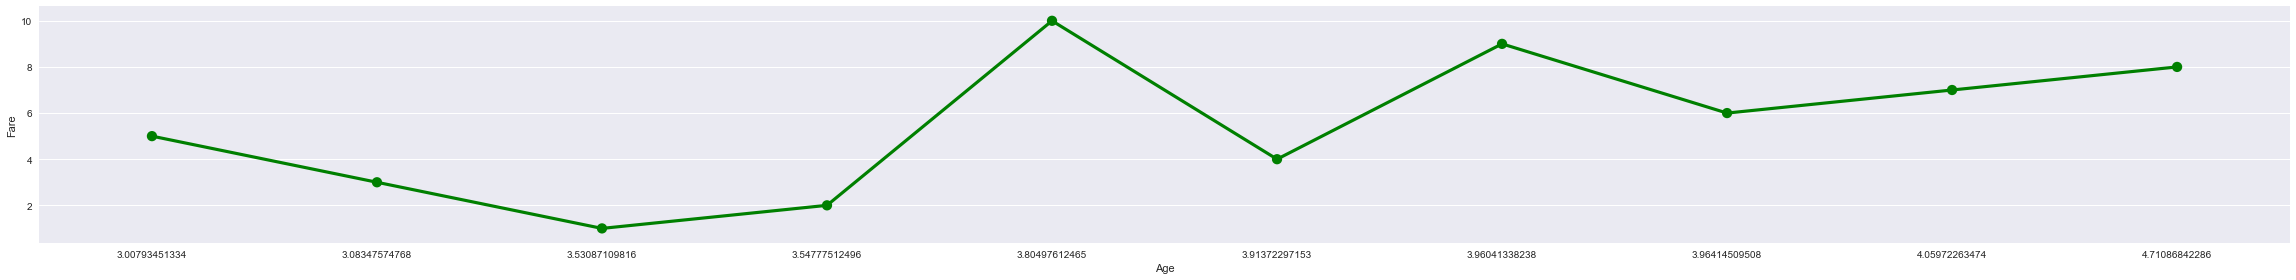

In [28]:
# Correlation between Age and Fare
mean1 = titanic_df[['Age','Fare']].groupby('Age', as_index = False).mean()
mean2 = titanic_df[['Age','Fare']].groupby('Fare', as_index = False).mean()
sns.factorplot(x = 'Age', y = 'Fare', data = mean1, color = 'red', aspect = 8)
sns.factorplot(x = 'Age', y = 'Fare', data = mean2 , color = 'green', aspect = 8)

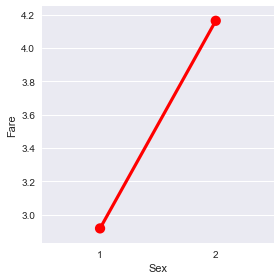

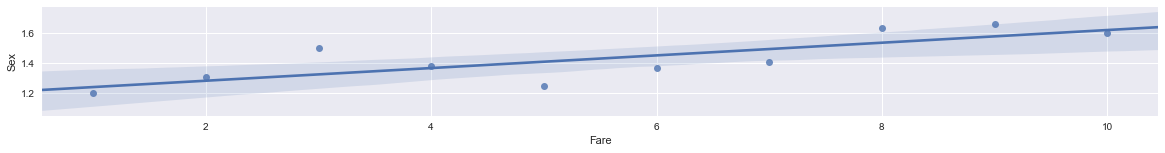

In [29]:
# Correlation between Sex and Fare
mean1 = titanic_df[['Sex','Fare']].groupby('Sex', as_index = False).mean()
data2 = titanic_df[['Sex','Fare']].groupby('Fare', as_index = False).mean()
sns.factorplot(x = 'Sex', y = 'Fare', data = mean1, color = 'red')
f, ax = plt.subplots(1,1,figsize = (20,2))
sns.regplot(x = 'Fare', y = 'Sex', data = data2 , ax = ax)

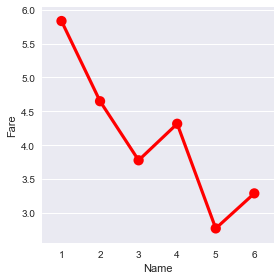

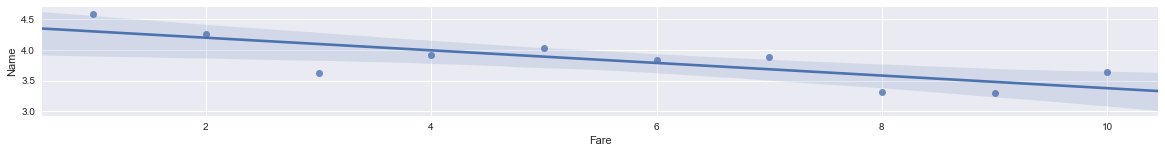

In [30]:
# Correlation between Name and Fare
mean1 = titanic_df[['Name','Fare']].groupby('Name', as_index = False).mean()
data2 = titanic_df[['Name','Fare']].groupby('Fare', as_index = False).mean()
sns.factorplot(x = 'Name', y = 'Fare', data = mean1, color = 'red')
f, ax = plt.subplots(1,1,figsize = (20,2))
sns.regplot(x = 'Fare', y = 'Name', data = data2 , ax = ax)

In [31]:
# Polynomial features

def add_poly(df):
    df['Age2'] = df['Age']* df['Age'].values
    df['Fare2'] = df['Fare']*df['Fare'].values
    df['Family2'] = df['Family']*df['Family'].values
    df['Name2'] = df['Name']*df['Name'].values
    df['Age_Fare'] = df['Age'] * df['Fare'].values
    df['Name_Fare'] = df['Name'] * df['Fare'].values
    df['Fare--Pclass'] = df['Fare'] / df['Pclass'].values
    df['Sex--Pclass'] = df['Sex'] / df['Pclass'].values
    df['Sex3_Age'] = df['Sex'] * df['Sex'] * df['Sex'] *df['Age'].values
    df['Sex3_Fare'] = df['Sex'] * df['Sex'] * df['Sex']* df['Fare'].values
    df['Sex3_Name'] = df['Sex'] * df['Sex'] * df['Sex']* df['Name'].values
    df['Sex_Fam'] = df['Sex'] * df['Family'].values
    df['Age--Sex'] = df['Age'] / df['Sex'].values
    df['Age--Fare'] = df['Age'] / df['Fare'].values
    df['Sex--Fam'] = df['Sex'] / df['Family'].values
    
    df = df.drop('Pclass', axis = 1)
    return df

titanic_df = add_poly(titanic_df)
test_df = add_poly(test_df)

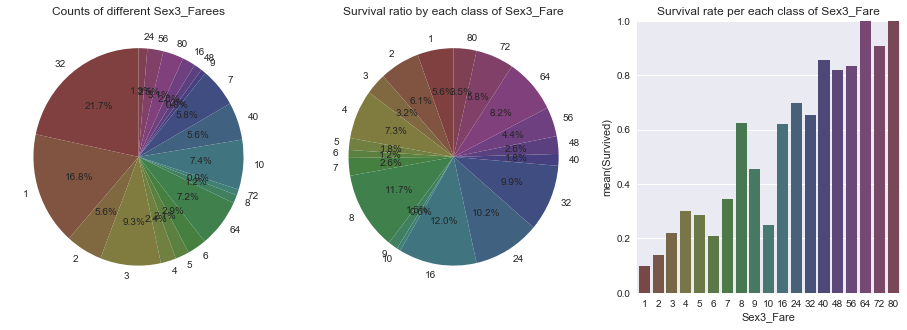

In [32]:
pie_chart('Sex3_Fare')

In [33]:
titanic_df.head()

,Survived,Name,Sex,Age,Fare,Embarked,Family,Age2,Fare2,Family2,...,Name_Fare,Fare--Pclass,Sex--Pclass,Sex3_Age,Sex3_Fare,Sex3_Name,Sex_Fam,Age--Sex,Age--Fare,Sex--Fam
0,0,5,1,2.711737,1,2,2,7.353515,1,4,...,5,0.333333,0.333333,2.711737,1,5,2,2.711737,2.711737,0.5
1,1,2,2,4.722292,7,1,2,22.300042,49,4,...,14,7.000000,2.000000,37.778336,56,16,4,2.361146,0.674613,1.0
2,1,3,2,3.214375,1,2,1,10.332210,1,1,...,3,0.333333,0.666667,25.715004,8,24,2,1.607188,3.214375,2.0
3,1,2,2,4.345313,6,2,2,18.881744,36,4,...,12,6.000000,2.000000,34.762503,48,16,4,2.172656,0.724219,1.0
4,0,5,1,4.345313,2,2,1,18.881744,4,1,...,10,0.666667,0.333333,4.345313,2,5,1,4.345313,2.172656,1.0


In [34]:
titanic_df.describe(include = 'all')

,Survived,Name,Sex,Age,Fare,Embarked,Family,Age2,Fare2,Family2,...,Name_Fare,Fare--Pclass,Sex--Pclass,Sex3_Age,Sex3_Fare,Sex3_Name,Sex_Fam,Age--Sex,Age--Fare,Sex--Fam
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.00000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,4.090909,1.352413,3.647368,3.355780,1.897868,1.466891,16.182894,17.497194,2.539843,...,12.887767,2.295548,0.731388,12.125780,13.624018,10.42312,2.067340,3.041768,1.772385,1.030490
std,0.486592,1.196266,0.477990,1.697891,2.498588,0.514624,0.623305,14.298377,24.456720,2.244428,...,9.952515,2.758011,0.504958,13.895472,19.629462,7.89435,1.334065,1.755051,1.412552,0.444665
min,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,2.000000,0.333333,0.333333,0.000000,1.000000,4.00000,1.000000,0.000000,0.000000,0.333333
25%,0.000000,3.000000,1.000000,2.586077,1.000000,2.000000,1.000000,6.687794,1.000000,1.000000,...,5.000000,0.333333,0.333333,3.088716,2.000000,5.00000,1.000000,1.858507,0.725894,1.000000
50%,0.000000,5.000000,1.000000,3.465695,2.000000,2.000000,1.000000,12.011041,4.000000,1.000000,...,10.000000,1.000000,0.500000,4.596632,4.000000,5.00000,2.000000,2.800955,1.369063,1.000000
75%,1.000000,5.000000,2.000000,4.596632,4.000000,2.000000,2.000000,21.129029,16.000000,4.000000,...,17.000000,2.500000,1.000000,20.688615,16.000000,16.00000,2.000000,3.968334,2.586077,1.000000
max,1.000000,6.000000,2.000000,10.000000,10.000000,3.000000,3.000000,100.000000,100.000000,9.000000,...,50.000000,10.000000,2.000000,62.910279,80.000000,32.00000,6.000000,10.000000,9.246042,2.000000


In [35]:
test_df.describe(include = 'all')

,PassengerId,Name,Sex,Age,Fare,Embarked,Family,Age2,Fare2,Family2,...,Name_Fare,Fare--Pclass,Sex--Pclass,Sex3_Age,Sex3_Fare,Sex3_Name,Sex_Fam,Age--Sex,Age--Fare,Sex--Fam
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,...,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,4.038278,1.363636,3.864550,3.413876,1.866029,1.442584,17.947324,18.571770,2.423445,...,12.916268,2.422249,0.753987,13.830575,13.997608,10.401914,2.026316,3.152691,1.796268,1.054625
std,120.810458,1.230495,0.481622,1.737758,2.633213,0.580452,0.585848,15.800435,26.571218,2.041565,...,10.347681,2.908339,0.521344,16.161753,20.313313,7.698840,1.227884,1.687906,1.298045,0.465152
min,892.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,0.333333,0.333333,0.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.333333
25%,996.250000,3.000000,1.000000,2.746934,1.000000,2.000000,1.000000,7.545646,1.000000,1.000000,...,5.000000,0.333333,0.333333,3.142556,2.000000,5.000000,1.000000,1.955690,0.818607,1.000000
50%,1100.500000,5.000000,1.000000,3.538178,2.000000,2.000000,1.000000,12.518700,4.000000,1.000000,...,10.000000,1.000000,0.583333,4.856917,4.000000,5.000000,2.000000,2.955954,1.439404,1.000000
75%,1204.750000,5.000000,2.000000,4.840433,4.000000,2.000000,2.000000,23.430602,16.000000,4.000000,...,16.000000,3.875000,1.000000,23.030463,16.000000,16.000000,2.000000,3.945009,2.623467,1.000000
max,1309.000000,6.000000,2.000000,10.000000,10.000000,3.000000,3.000000,100.000000,100.000000,9.000000,...,50.000000,10.000000,2.000000,80.000000,80.000000,24.000000,6.000000,8.813135,6.439404,2.000000


In [36]:
# define training and testing sets

Y = titanic_df['Survived']
X = titanic_df.drop('Survived', axis=1) 
# X_train, X_cv, Y_train, Y_cv = train_test_split(X, Y, test_size=0.3, random_state=42)
X_train, Y_train = X, Y
X_test  = test_df.drop("PassengerId",axis=1).copy()


In [37]:
# validation test & Learning curve

def valid_test(model, param, param_candidates):
    
    # candidates = np.logspace(-7, 7, 10) # for alpha, C 
    # candidates = [1,2,3,4,5,6,7,8,9,10]# for integers
    train_scores, valid_scores = validation_curve(model, X_cv, Y_cv, param, param_candidates)
    avg_ts, avg_vs = train_scores.mean(axis = 1), valid_scores.mean(axis = 1)
    sd_ts, sd_vs = train_scores.std(axis = 1), valid_scores.std(axis = 1)
    vs_max_ix = np.argmax(avg_vs)
    best = param_candidates[vs_max_ix]
    print('The best {} value for {} is {}'.format(param, model, best))
    plt.figure()
    plt.title('Validation Test')
    plt.ylabel('Scores')
    plt.xlabel('Candidate {} index'.format(param))
    plt.plot(range(10), avg_ts, label = 'Training Scores')
    plt.plot(range(10), avg_vs, label = 'Cross validation Scores')
    plt.legend(loc = 'best')
    return best

def Learning_curve(model):
    train_sizes = [50,100,150,200,250,300,350,400]
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, Y_train, train_sizes=train_sizes)   
    train_scores_mean, test_scores_mean = train_scores.mean(axis = 1), test_scores.mean(axis = 1)
    train_scores_std, test_scores_std = train_scores.std(axis = 1), test_scores.std(axis = 1)
    plt.figure()
    plt.title('Learning curve')
    plt.ylabel('Scores')
    plt.xlabel('Training Set')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc = 'best')
    plt.show()

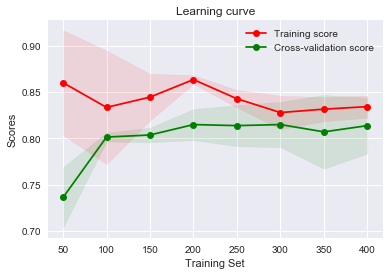

Train score is 0.8260381593714927


In [46]:
# Logistic Regression

# best_C = valid_test(LogisticRegression(), "C", np.logspace(-7, 7, 10))
# LR = LogisticRegression(C = best_C)
LR = LogisticRegression(C = 10000)
Learning_curve(LR)
LR.fit(X_train, Y_train)
Y_test_pred_LR = LR.predict(X_test)
print('Train score is {}'.format(LR.score(X_train, Y_train)))
# print('Cross validation score is {}'.format(LR.score(X_cv, Y_cv)))

# polynomial_features = PolynomialFeatures(degree=2,include_bias=False)
# pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", LR)])
# Learning_curve(pipeline)
# # Learning_curve(LR)

# pipeline.fit(X_train, Y_train)
# Y_test_pred_LR = pipeline.predict(X_test)
# print('Train score is {}'.format(pipeline.score(X_train, Y_train)))
# print('Cross validation score is {}'.format(pipeline.score(X_cv, Y_cv)))

/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged y

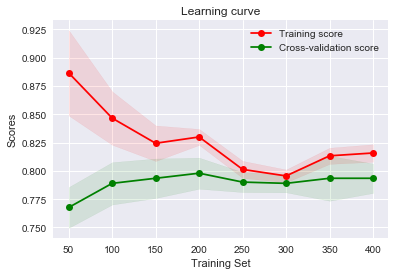

train score is 0.8024691358024691


In [48]:
# Neural networking (MLP)
# best_alpha = valid_test(MLPClassifier(), 'alpha', np.logspace(-5, -1, 10))
# MLP = MLPClassifier(alpha=best_alpha, hidden_layer_sizes=(10, 10, 10), random_state=1, max_iter=200)
MLP = MLPClassifier(alpha=1e-05, hidden_layer_sizes=(12, 12, 12), random_state=1, max_iter=200)
MLP.fit(X_train, Y_train)
Learning_curve(MLP)
Y_test_pred_MLP = MLP.predict(X_test)

print('train score is {}'.format(MLP.score(X_train, Y_train)))
# print('cross validation score is {}'.format(MLP.score(X_cv, Y_cv)))

# polynomial_features = PolynomialFeatures(degree=2,include_bias=False)
# pipeline = Pipeline([("polynomial_features", polynomial_features), ("MLP_Classifier", MLP)])
# pipeline.fit(X_train, Y_train)
# Learning_curve(pipeline)
# Y_test_pred_MLP = MLP.predict(X_test)

# print('train score is {}'.format(pipeline.score(X_train, Y_train)))
# print('cross validation score is {}'.format(pipeline.score(X_cv, Y_cv)))

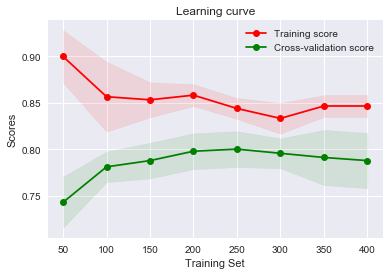

train score is 0.8395061728395061


In [41]:
# Support Vector Machines
# best_gamma = valid_test(SVC(), "gamma", np.logspace(-5, 5, 10))
# best_C = valid_test(SVC(gamma = best_gamma), "C", np.logspace(-5, 5, 10))
# svm = SVC(C = best_C, gamma = best_gamma)
svm = SVC(C = 3.6, gamma = 0.0016)
svm.fit(X_train, Y_train)
Learning_curve(svm)
Y_test_pred_svm = svm.predict(X_test)
print('train score is {}'.format(svm.score(X_train, Y_train)))
# print('cross validation score is {}'.format(svm.score(X_cv, Y_cv)))

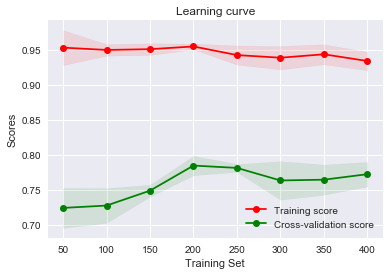

Train score is 0.9304152637485971


In [52]:
# RandomForestClassifier

RF = RandomForestClassifier(n_estimators=5)
Learning_curve(RF)
RF.fit(X_train, Y_train)
Y_test_pred_RF = RF.predict(X_test)
print('Train score is {}'.format(RF.score(X_train, Y_train)))

In [44]:
submission = pd.DataFrame({"PassengerId": test_df["PassengerId"],"Survived": Y_test_pred_LR})
submission.to_csv('titanic_9.csv', index=False)
